# Logistic regression

## Titanic dataset

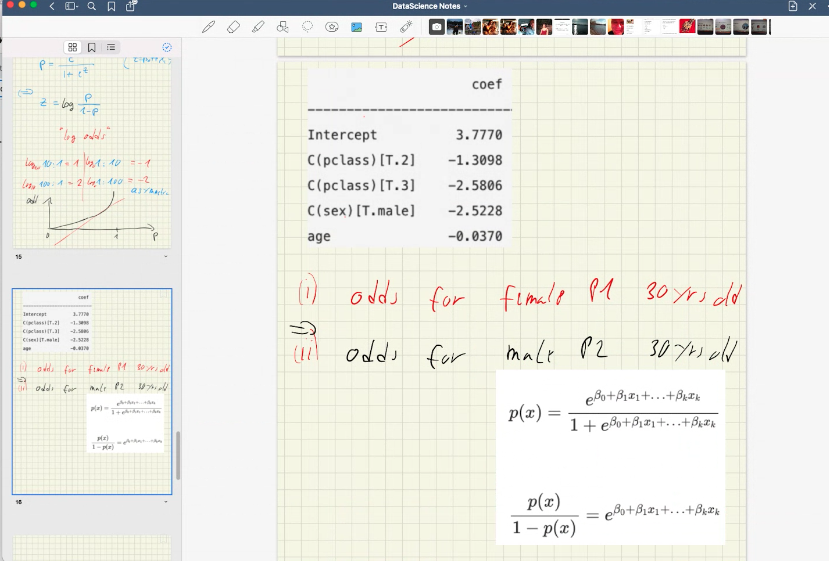

In [4]:
import numpy as np

In [10]:
p = np.exp(3.777)*np.exp(-0.0370*30)

In [6]:
np.exp(3.777-0.0370*30)

14.396714200154689

In [11]:
#odds
p

14.396714200154689

In [14]:
#probability
p/(1+p)

0.9350510773272681

In [17]:
#odds
p2 = p*np.exp(-1.3098-2.5228)
p2

0.3117355645702788

In [18]:
#probability
p2/(1+p2)

0.23765122559012308

# ROC / AUC

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

live = pd.read_csv('../data/JoinedpregNSFG.csv.gz')

#define first babies
firsts = live[live.birthord == 1]
#and all others:
others = live[live.birthord != 1]

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
stats.chisqprob(10,3)

live['boy'] = (live.babysex==1).astype(int)

formula='boy ~ agepreg + fmarout5==5 + infever==1'
model = smf.logit(formula, data=live)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.691874
         Iterations 4


## Create ROC curve 

In [80]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

y_true = live["boy"]

y_score = results.predict() #probabilities from the statsmodels for each baby being male 

fpr, tpr, threshold = metrics.roc_curve(y_true, y_score)
roc_auc = metrics.auc(fpr, tpr)

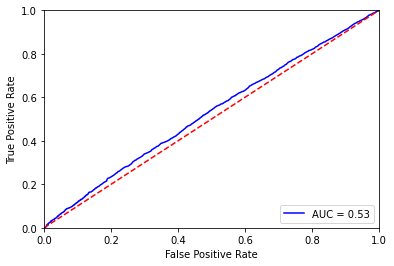

In [81]:

plt.plot(fpr, tpr,'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right');